<a href="https://colab.research.google.com/github/metehanunal0/ML-Churn-Modelling-NN/blob/main/ChurnNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.datasets import make_classification
import numpy as np
from prettytable import PrettyTable

# Churn Modelling w/ Neural Network

In [ ]:
df = pd.read_csv("Churn_Modelling.csv")

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
X = df.iloc[:,3:13].values
y = df.iloc[:,13].values

In [ ]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
X[:,1] = le.fit_transform(X[:,1])

le2 = preprocessing.LabelEncoder()
X[:,2] = le.fit_transform(X[:,2])

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ohe = ColumnTransformer([('ohe',OneHotEncoder(dtype=float),[1])], remainder='passthrough')
X = ohe.fit_transform(X)
X = X[:,1:]

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.fit_transform(x_test)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
classifier = Sequential()
classifier.add(Dense(6, kernel_initializer="uniform" , activation= "relu", input_dim= 11))

* adding a extra hidden layer


In [ ]:
classifier.add(Dense(6, kernel_initializer="uniform" , activation= "relu" ))

* çıkış katmanı

In [ ]:
classifier.add(Dense(1, kernel_initializer="uniform" , activation= "sigmoid" ))

In [ ]:
classifier.compile(optimizer = "adam", loss="binary_crossentropy", metrics = ["accuracy"])

classifier.fit(X_train, y_train, epochs = 50)

y_pred = classifier.predict(X_test)

Epoch 1/50
210/210 [==============================] - 2s 2ms/step - loss: 0.5768 - accuracy: 0.7979
Epoch 2/50
210/210 [==============================] - 0s 2ms/step - loss: 0.4380 - accuracy: 0.7979
Epoch 3/50
210/210 [==============================] - 0s 2ms/step - loss: 0.4308 - accuracy: 0.7979
Epoch 4/50
210/210 [==============================] - 0s 2ms/step - loss: 0.4278 - accuracy: 0.7979
Epoch 5/50
210/210 [==============================] - 0s 2ms/step - loss: 0.4254 - accuracy: 0.7979
Epoch 6/50
210/210 [==============================] - 0s 2ms/step - loss: 0.4227 - accuracy: 0.7979
Epoch 7/50
210/210 [==============================] - 0s 2ms/step - loss: 0.4203 - accuracy: 0.7979
Epoch 8/50
210/210 [==============================] - 0s 2ms/step - loss: 0.4182 - accuracy: 0.8043
Epoch 9/50
210/210 [==============================] - 0s 2ms/step - loss: 0.4169 - accuracy: 0.8193
Epoch 10/50
210/210 [==============================] - 0s 2ms/step - loss: 0.4160 - accuracy: 0.8240

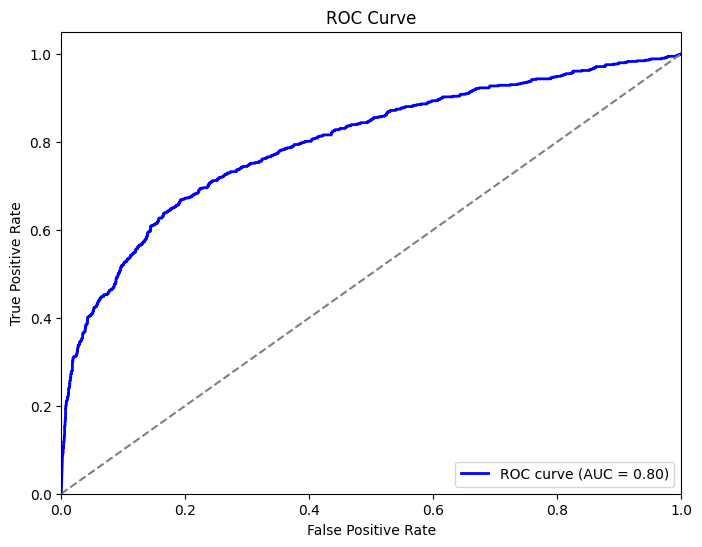

In [ ]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, y_pred)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
y_pred = (y_pred > 0.5)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

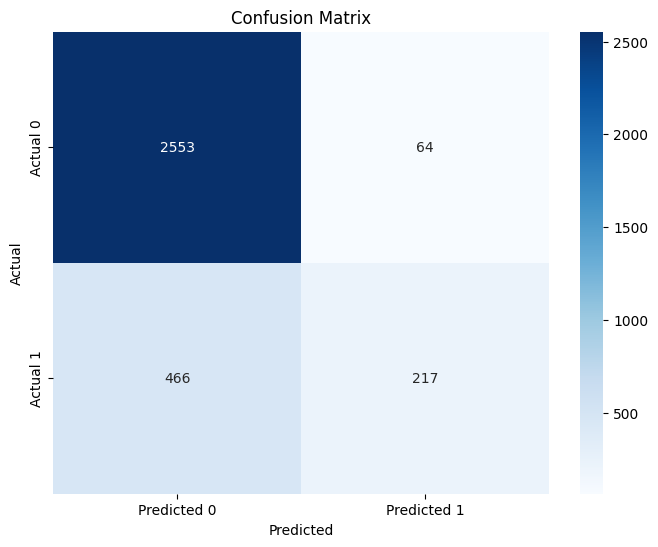

In [ ]:
# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

In [ ]:
# Create a PrettyTable instance
table = PrettyTable()

# Add columns to the table
table.field_names = ["Metric", "Value"]

# Add rows to the table
table.add_row(["Accuracy", f"{accuracy:.2f}"])
table.add_row(["Precision", f"{precision:.2f}"])
table.add_row(["Recall", f"{recall:.2f}"])
table.add_row(["F1-Score", f"{f1:.2f}"])

# Set the alignment of the columns
table.align["Metric"] = "l"
table.align["Value"] = "r"

# Print the table
print(table)

+-----------+-------+
| Metric    | Value |
+-----------+-------+
| Accuracy  |  0.84 |
| Precision |  0.77 |
| Recall    |  0.32 |
| F1-Score  |  0.45 |
+-----------+-------+
